## **Objective**

Menghitung jarak euclidean menggunakan semangka sebagai data uji dan menentukan kategori semangka dengan melihat 4 tetangga terdekat berdasarkan jarak

## **Import dan Load Dataset**

In [111]:
import math
from data import df
import matplotlib.pyplot as plt
import seaborn as sns

df

,nama_produk,senin,selasa,rabu,kamis,jumat,sabtu,kategori,jarak
0,jeruk bali,230,235,267,300,267,210,sedang,117.277449
1,salak,109,120,110,130,180,123,kurang,203.796467
2,anggur,89,90,95,100,101,98,kurang,279.492397
3,apel,300,290,398,299,301,330,laku,285.651886
4,manggis,450,430,410,420,405,460,laku,541.998155
5,durian,235,269,299,278,298,250,sedang,158.455041
6,dukuh,130,90,86,102,101,110,kurang,264.510869
7,jambu air,95,90,101,92,95,99,kurang,280.565500
8,alpukat,190,210,280,245,230,290,laku,114.638562
9,semangka,200,203,210,221,219,204,,NaN


## **Melihat korelasi antar variable numerik menggunakan matirx correlation**

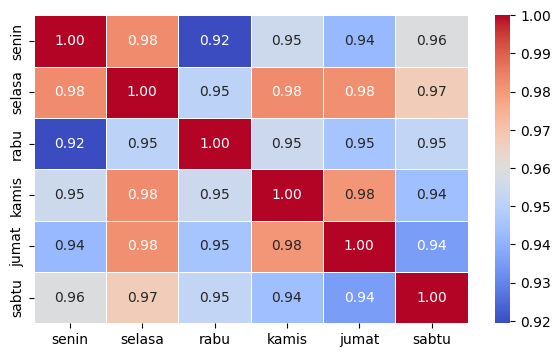

In [118]:
numeric_col = df.select_dtypes(include=int)

plt.figure(figsize=(7, 4))
sns.heatmap(numeric_col.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

Dilihat dari matrix correlation diatas, dapat diketahui bahwa setiap variable numeric saling berkorelasi

## **Menghitung jarak euclidean menggunakan semangka sebagai data uji**

In [113]:
def euclidean_distance(x, y):
    distance = 0.0
    for i in range(len(x)):
        distance += (x[i] - y[i]) ** 2
    return math.sqrt(distance)

distances = []
y = df[df['nama_produk'] == 'semangka'].iloc[0][['senin', 'selasa', 'rabu', 'kamis', 'jumat', 'sabtu']].to_numpy()
for index, row in df.iterrows():
    if row['nama_produk'] != 'semangka':
        produk = row['nama_produk']
        x = row[['senin', 'selasa', 'rabu', 'kamis', 'jumat', 'sabtu']].to_numpy()
        distance = euclidean_distance(x, y)
        distances.append(distance)

distances

[117.27744881263405,
 203.79646709401024,
 279.49239703433796,
 285.65188604313465,
 541.9981549784095,
 158.45504094221806,
 264.51086934188544,
 280.5655003737986,
 114.63856244737195]

## **Memasukan hasil dari perhitungan jarak euclidean ke dalam dataset**

In [119]:
df.loc[df['nama_produk'] != 'semangka', 'jarak'] = distances
df

,nama_produk,senin,selasa,rabu,kamis,jumat,sabtu,kategori,jarak
0,jeruk bali,230,235,267,300,267,210,sedang,117.277449
1,salak,109,120,110,130,180,123,kurang,203.796467
2,anggur,89,90,95,100,101,98,kurang,279.492397
3,apel,300,290,398,299,301,330,laku,285.651886
4,manggis,450,430,410,420,405,460,laku,541.998155
5,durian,235,269,299,278,298,250,sedang,158.455041
6,dukuh,130,90,86,102,101,110,kurang,264.510869
7,jambu air,95,90,101,92,95,99,kurang,280.565500
8,alpukat,190,210,280,245,230,290,laku,114.638562
9,semangka,200,203,210,221,219,204,,NaN


## **Menampilkan 4 data sesuai jarak terdekat**

In [115]:
df_sorted = df.sort_values(by='jarak')

df_sorted.head(4)

,nama_produk,senin,selasa,rabu,kamis,jumat,sabtu,kategori,jarak
8,alpukat,190,210,280,245,230,290,laku,114.638562
0,jeruk bali,230,235,267,300,267,210,sedang,117.277449
5,durian,235,269,299,278,298,250,sedang,158.455041
1,salak,109,120,110,130,180,123,kurang,203.796467


## **Kesimpulan**

Dapat ditarik kesimpulan, bahwa data semangka masuk ke dalam kategori sedang, karena dari 4 tetangga terdekat, 2 diantaranya masuk ke dalam kategori sedang